# Gathering Data

In [9]:
import pandas as pd
import requests
import json
import time
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### Gathering data source 1

In [10]:
#Loading provided file
file_data = pd.read_csv('twitter-archive-enhanced.csv')

### Gathering data source 2

Using a provided link: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv , I will download the file containing predictions of the breed of dog for each tweet - predictions made using a neural network.

In [11]:
#Requesting file from a given link
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.status_code
#Requesting file from an URL and checking if request was successful

200

In [12]:
with open('C:/Users/User/Desktop/Data Analyst/Wrangle and Analyze Data/image_predictions.tsv', 'wb') as f:
    f.write(r.content)
#Saving the file

In [13]:
image_data = pd.read_csv('image_predictions.tsv', sep='\t') 

### Gathering data source 3

I will now create an API object that will allow me to gather data from Twitter

In [93]:
import tweepy

consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
#Accessing Twitter API using tweepy 

In [94]:
#Creating a list of tweet ids used later for API
id_list=list(file_data['tweet_id'])

In [95]:
working_tweets =[]
failed_tweets = []
with open('tweet_json.txt', 'w') as file:
    t = time.process_time()
    for tweet_id in id_list:
        try:
            tweet_det = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_det._json, file)
            file.write('\n')
            working_tweets.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            failed_tweets.append(tweet_id)
    elapsed_time = time.process_time()-t
    print(elapsed_time)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
770743923962707968 [{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 592


754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 608


107.71875


In [264]:
len(failed_tweets)

14

In [14]:
#Create 3 lists and itterate through the file retrieving tweet ids, retweet counts and favourite counts.
tweet_id=[]
retweet_count=[]
favourite_count=[]
with open('tweet_json.txt') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            tweet_id.append(tweet_data['id'])
            favourite_count.append(tweet_data['favorite_count'])
            retweet_count.append(tweet_data['retweet_count'])

In [15]:
#Create dataframe out of 3 lists created in previous code
tweets_data = pd.DataFrame(
    {'tweet_id': tweet_id,
    'retweet_count': retweet_count,
    'favourite_count': favourite_count})

In [16]:
#Reogarnize the columns order
tweets_data = tweets_data[['tweet_id', 'retweet_count','favourite_count']]

In [17]:
#Saving tweets data to a separate file.
tweets_data.to_csv('tweets_data.csv', index=False)

In [18]:
#Creating copies of files to work with
file_data_copy = file_data.copy()
image_data_copy = image_data.copy()
tweets_data_copy = tweets_data.copy()

# Assessing Data

### Programmatic Assessment

In [19]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
file_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
image_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_data_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
tweets_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id           2342 non-null int64
retweet_count      2342 non-null int64
favourite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [25]:
tweets_data_copy.describe()

,tweet_id,retweet_count,favourite_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,2950.523911,8000.157985
std,6.832408e+16,4962.209505,12382.364230
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,592.500000,1382.750000
50%,7.186224e+17,1377.000000,3483.000000
75%,7.986971e+17,3442.250000,9802.750000
max,8.924206e+17,84082.000000,164931.000000


### Visual Assessment

In [26]:
file_data_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
file_data_copy.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [28]:
file_data_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
925,755110668769038337,NaN,NaN,2016-07-18 18:43:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Watson. He trust falls on command. 13/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755110668...,13,10,Watson,None,None,None,None


In [29]:
image_data_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
image_data_copy.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [31]:
image_data_copy.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True


In [32]:
tweets_data_copy.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8370,38209
1,892177421306343426,6180,32763
2,891815181378084864,4090,24670
3,891689557279858688,8505,41532
4,891327558926688256,9213,39725


In [33]:
tweets_data_copy.tail()

,tweet_id,retweet_count,favourite_count
2337,666049248165822465,40,107
2338,666044226329800704,139,296
2339,666033412701032449,44,125
2340,666029285002620928,47,129
2341,666020888022790149,508,2544


In [34]:
tweets_data_copy.sample()

,tweet_id,retweet_count,favourite_count
1768,677687604918272002,898,2586


### Issues Found (Quality and Tidiness)

In [13]:
file_data_copy.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

One of the requirements for the assignment is working only with the original ratings - not retweets. 'retweeted_status_id' column shows that 181 of the tweets are actually retweets.

In [14]:
len(image_data_copy.tweet_id)

2075

In [15]:
len(file_data_copy.tweet_id)

2356

### Quality issues (project required 8 examples):

-  Timestamp not represented as datetype
-  retweeted_status_timestamp uses wrong data format, should be removed as contains mainly NaN
-  2 columns right after tweet_id are mainly NaN
-  Source column uses HTML tags
-  Some tweets aren't ratings - remove any where denominator is not 10
-  Not all tweets have photos
-  retweeted_status_id and retweeted_status_user_id are mainly NaNs 
-  Some rows have None in the name column


## Tidiness issues (project required 2 examples):
-  There are 4 columns representing 'dog type' - should be 1
-  Data spread across 3 tables
-  Retweeted status: some tweets are actually retweets

# Clean

### Addressing them:

### Issue 1

Changing data type of the date to datetime using pandas to_datetime

In [108]:
#Changing timestamp column from a string to a datetime format.
file_data_copy.timestamp = pd.to_datetime(file_data_copy['timestamp'])

In [3]:
#Testing
file_data_copy.info()

NameError: name 'file_data_copy' is not defined

### Issue 2

The retweeted_status_timestamp contains wrong data type - it should be transformed into datetype but as column is full of NaNs - remove it using drop function

In [119]:
#Removing timestamp of retweets, as it's mainly NaNs 
file_data_copy.drop(['retweeted_status_timestamp'], axis=1, inplace=True)

In [ ]:
#Test
file_data_copy.info()

### Tidiness Issue 3

Remove rows where is_reply_to_status_id has a value by creating new dataframe that filters on it. Needed to be done before dropping columns in Issue 3

In [110]:
#Removing rows where in_reply_to_status_id isn't null - meaning the tweet is a retweet.
file_data_copy = file_data_copy[np.isnan(file_data_copy['in_reply_to_status_id'])]

In [5]:
#Testing
file_data_copy.info()

NameError: name 'file_data_copy' is not defined

### Issue 3

Removing 2 columns by using drop function

In [112]:
#Removing both columns as they were only needed to establish if tweet is original or a retweet.
file_data_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

### Issue 4

Column Source contains HTML tags - extract link from between the tags.

In [42]:
pd.set_option('display.max_colwidth', -1) #Used to display all content of a cell.
file_data_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [56]:
#Using a function to remove any HTML tags and creating list with new, clean text that is later used to replace values in source column
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

new_source = []
for row in file_data_copy['source']:
    cleantext = cleanhtml(row)
    new_source.append(cleantext)  


In [60]:
file_data_copy['source'] = new_source

In [63]:
#Testing
file_data_copy['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Issue 5

Removing rows where rating_denominator isn't equal to 10 by overwriting  dataframe by using a filter

In [114]:
file_data_copy.rating_denominator.value_counts()

10     2260
11        3
50        3
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

Some of the denominators are actually dates or other values - for example tweet from 2016-04-03 says 'split 50/50' which isn't rating. As all dog ratings have a denominator of 10, except for group of dogs (tweet from 2016-05-13 with rating 204/170) but we won't be working with dog groups.

In [115]:
#Removing rows where denominator isn't equal to 10.
file_data_copy = file_data_copy[file_data_copy['rating_denominator']==10]

In [ ]:
#Testing
file_data_copy['rating_denominator'].value_counts()

### Issue 6

Comparing tweet ids from 2 dataframes and removing rows where IDs aren't matching using isin function

In [116]:
file_data_copy['tweet_id'].isin(image_data_copy['tweet_id']).value_counts()

True     2035
False     225
Name: tweet_id, dtype: int64

225 tweets in the dataset doesn't have photos. They need to be removed as we're only supposed to work with tweets with photos.

In [117]:
#Comparing tweet id from tweet dataframe to tweet id from images dataframe and removing those that aren't there.
file_data_copy = file_data_copy[file_data_copy['tweet_id'].isin(image_data_copy['tweet_id'])]

In [ ]:
#Test
file_data_copy['tweet_id'].value_counts()

### Issue 7

Using drop function to remove 2 columns

In [118]:
#Removing 2 columns filled with mainly NaNs
file_data_copy.drop(['retweeted_status_id', 'retweeted_status_user_id'], axis=1, inplace=True)

In [6]:
#Test
file_data_copy.info()

NameError: name 'file_data_copy' is not defined

### Issue 8

Investigating the number of missing dog names by a visual assessment. 

In [120]:
file_data_copy.query('name == "None"')['name'].count()

545

In [121]:
file_data_copy.query('name == "None"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,2017-07-18 16:08:03,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,2017-07-18 00:07:08,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
37,885167619883638784,2017-07-12 16:03:00,Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
47,883117836046086144,2017-07-07 00:17:54,Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
59,880872448815771648,2017-06-30 19:35:32,Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
62,880095782870896641,2017-06-28 16:09:20,Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11,10,None,None,None,None,None


After investigating some posts with 'None' in name column in Excel I discovered that around 95% of these posts don't list dog's name. Some of them are photos that the owner of this Twitter discovered himself (hence no knowledge of dog's name) or photos of dogs that look like other animals (where he jokes about people sending him photos of bears, cats or other animals). Posts where the entire text aren't recognized, same goes for posts where name is right at the beginning of the sentence. 

Apart from 'None' there's post where the name is: 'a', 'all', 'his'. The only way of retrieving name from these posts (if the name is mentioned) would be to do it manually. As the name isn't very important to this analysis, I'll skip this step to save time.

### Tidiness Issue 1 

Last 4 columns should be dropped and using the extract function get every mention of dog type into a newly created column dog_type.

In [122]:
file_data_copy.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


Last 4 columns, rather than contain 1s and 0s have the name of the column repeated as a value where the dog falls into the right category. To use melt function this needs to be changed. Rather than scan through 4 columns we'll filter through the text column and look for key words: doggo, floofer, pupper and puppo.

In [91]:
#Scanning text column in search of words representing dog types using findall and joining words from the list
file_data_copy['dog_type'] = file_data_copy['text'].str.findall('doggo|floofer|pupper|puppo').apply(', '.join,1)

In [94]:
#Test
file_data_copy.dog_type

0             
1             
2             
3             
4             
5             
6             
7             
8             
9       doggo 
10            
11            
12      puppo 
13            
14      puppo 
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28            
29      pupper
         ...  
2326          
2327          
2328          
2329          
2330          
2331          
2332          
2333          
2334          
2335          
2336          
2337          
2338          
2339          
2340          
2341          
2342          
2343          
2344          
2345          
2346          
2347          
2348          
2349          
2350          
2351          
2352          
2353          
2354          
2355          
Name: dog_type, Length: 2356, dtype: object

In [124]:
#Dropping 4 columns that are now represented in 1
to_drop = ['doggo', 'floofer','pupper','puppo']
file_data_copy.drop(to_drop, axis=1, inplace=True)

In [125]:
#Testing
file_data_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


### Tidiness Issue 2

Data is spread across 3 tables, they should all be stored in 1 table - using merge function

In [126]:
#Merging file_data_copy and tweets_data_copy
tweet_merged = pd.merge(file_data_copy, tweets_data_copy, on='tweet_id')

In [128]:
#Merging it with image_data_copy
tweet_merged = pd.merge(tweet_merged, image_data_copy, on='tweet_id')

In [8]:
#Test
tweet_merged.head(1)

NameError: name 'tweet_merged' is not defined

# Storing, Analyzing and Vizualizing Data

## Storing

In [132]:
#Saving the dataframe to a master csv file:
tweet_merged.to_csv('twitter_archieve_master.csv', index=False)

### Insight 1

In [ ]:
#Selecting only guesses where the first guess was an actual dog (eliminate guesses like 'orange' etc)
dog_true = tweet_merged.query('p1_dog=True')

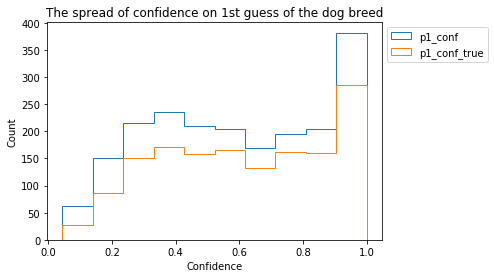

In [266]:
#Creating 2 plots - one with no filter, second - only where the first guess was a dog
plt.pyplot.hist(tweet_merged['p1_conf'], histtype='step', label='p1_conf')
plt.pyplot.hist(dog_true['p1_conf'], histtype='step', label='p1_conf_true')
plt.pyplot.legend(bbox_to_anchor=(1.0, 1))
plt.pyplot.xlabel('Confidence')
plt.pyplot.ylabel('Count')
plt.pyplot.title('The spread of confidence on 1st guess of the dog breed');

In [171]:
tweet_merged['p1_conf'].describe()

count    2028.000000
mean        0.595083
std         0.271555
min         0.044333
25%         0.363889
50%         0.588030
75%         0.846718
max         1.000000
Name: p1_conf, dtype: float64

In [172]:
dog_true['p1_conf'].describe()

count    1500.000000
mean        0.613671
std         0.259993
min         0.044333
25%         0.389419
50%         0.612080
75%         0.850559
max         0.999956
Name: p1_conf, dtype: float64

Even after eliminating over 500 pictures where the first guess wasn't a dog, the mean of the confidence doesn't improve that much - only by about 0.02. Over 25% of the guesses were eliminated as the alorithm thought the dog wasn't even an animal. However, it's worth mentioning that some photos represent dogs eating food or dressed up where the algorithm recognized something correctly, but focused on a different part of the photo, not the dog.

### Insight 2

In [181]:
#Creating a copy of the data we need for next graph 
tweet_analyse = tweet_merged[['timestamp', 'retweet_count', 'favourite_count']]

In [184]:
#Setting timestamp column as index
tweet_analyse.set_index('timestamp', inplace=True)

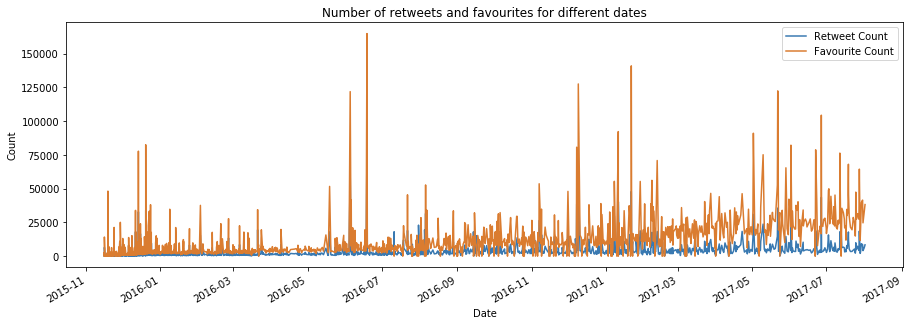

In [235]:
plt.pyplot.figure(figsize=(15,5))
tweet_analyse['retweet_count'].plot(color='#3979b1', label='Retweet Count')
tweet_analyse['favourite_count'].plot(color='#da7c30', 
                                      label='Favourite Count')
plt.pyplot.xlabel('Date')
plt.pyplot.ylabel('Count')
plt.pyplot.legend(bbox_to_anchor=(1, 1))
plt.pyplot.title('Number of retweets and favourites for different dates');

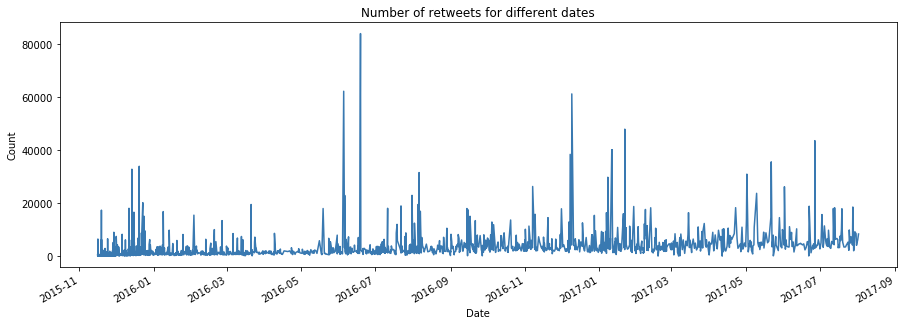

In [234]:
plt.pyplot.figure(figsize=(15,5))
tweet_analyse['retweet_count'].plot(color='#3979b1', label='Retweet Count')
plt.pyplot.ylabel('Count')
plt.pyplot.xlabel('Date')
plt.pyplot.title('Number of retweets for different dates');

As number of favourites is higher for most of the tweets it was worth plotting retweet count on a separate graph to see user tendencies. There are dates when some tweets were very popular, reaching over 6000 retweets and 10000 favourites. Let's try to find most popular posts.

### Insight 3

In [238]:
max_retweets = tweet_merged.sort_values('retweet_count', ascending=False)

In [249]:
max_retweets[['tweet_id', 'retweet_count', 'favourite_count', 'rating_numerator']].head()

,tweet_id,retweet_count,favourite_count,rating_numerator
837,744234799360020481,84082,164931,13
871,739238157791694849,62301,121922,13
423,807106840509214720,61296,127605,13
322,822872901745569793,47978,141002,13
59,879415818425184262,43643,104464,13


In [240]:
max_favourites = tweet_merged.sort_values('favourite_count', ascending=False)

In [248]:
max_favourites[['tweet_id', 'retweet_count', 'favourite_count', 'rating_numerator']].head()

,tweet_id,retweet_count,favourite_count,rating_numerator
837,744234799360020481,84082,164931,13
322,822872901745569793,47978,141002,13
423,807106840509214720,61296,127605,13
111,866450705531457537,35625,122462,13
871,739238157791694849,62301,121922,13


4 of these tweets have very high number of retweets and favourites. All of them have a 13/10 rating.

In [250]:
tweet_merged['rating_numerator'].describe()

count    2028.000000
mean       11.703649
std        40.323647
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

With the mean of 11.7/10 rating rating 13/10 is quite high. Both twitter users and the author thought these dogs were exceptionally good. There was, however, a dog, that got a rating of 1776/10. Let's find it.

In [255]:
pd.set_option('display.max_colwidth', -1) #Used to display all content of a cell.
tweet_merged[tweet_merged['rating_numerator']==1776]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favourite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
790,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN,2647,5413,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


### Insight 4

In [259]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')  #Importing image posted with the highest rated dog.

The tweet was posted on the 4th of July which is the Independence Day in United States of America - dog seems to be dressed properly - hence the high rating.

In [262]:
max_favourites[['tweet_id', 'expanded_urls', 'p1', 'p1_conf']].head()

,tweet_id,expanded_urls,p1,p1_conf
837,744234799360020481,https://twitter.com/dog_rates/status/744234799360020481/video/1,Labrador_retriever,0.825333
322,822872901745569793,https://twitter.com/dog_rates/status/822872901745569793/photo/1,Lakeland_terrier,0.196015
423,807106840509214720,https://twitter.com/dog_rates/status/807106840509214720/video/1,Chihuahua,0.505370
111,866450705531457537,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",French_bulldog,0.905334
871,739238157791694849,https://twitter.com/dog_rates/status/739238157791694849/video/1,Eskimo_dog,0.503372


Only the first dog from the tweet with most retweets was guessed correctly - it is indeed labrador retriever. 4th tweet does have french bulldog on one of the photos, but the dog the tweet is about is not a bulldog. Last dog is most probably a husky, so an eskimo dog, that looks very similar, isn't a bad guess for a machine.